<a href="https://colab.research.google.com/github/MaggieWelch/MLProject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring data

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/MaggieWelch/MLProject/refs/heads/main/Spotify%20Most%20Streamed%20Songs.csv'
df = pd.read_csv(url)
print(df.head())
df.shape

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                147  141381703                  4

(953, 25)

In [4]:
print(df.columns.tolist())

['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'cover_url']


Dropping variables/columns that are not relevent to our analysis

In [5]:
columns_to_drop = ['artist_count', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'cover_url', ]
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,track_name,artist(s)_name,released_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,2023,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,2023,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,2019,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,2023,303236322,144,A,Minor,65,23,80,14,63,11,6


Converting the streams variable values into numerical values, and then attempting to organize them numerically

In [6]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.sort_values(by='streams')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2.762000e+03,21,...,A#,Major,49,78,64,19,0,11,4,https://i.scdn.co/image/ab67616d0000b2735c7336...
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1.365184e+06,13,...,G,Major,82,62,74,10,0,33,7,Not Found
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,1.159939e+07,17,...,NaN,Major,79,92,89,5,0,6,5,Not Found
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,1.195664e+07,5,...,B,Minor,93,68,65,42,0,12,25,https://i.scdn.co/image/ab67616d0000b27319d608...
68,Overdrive,Post Malone,1,2023,7,14,410,36,1.478042e+07,36,...,C#,Major,56,48,73,0,0,35,4,https://i.scdn.co/image/ab67616d0000b27372694f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,F#,Minor,82,54,59,69,0,18,10,https://i.scdn.co/image/ab67616d0000b273c6f7af...
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,C#,Major,50,45,41,75,0,11,3,https://i.scdn.co/image/ab67616d0000b273fc2101...
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,C#,Minor,83,93,65,58,0,9,8,https://i.scdn.co/image/ab67616d0000b273ba5db4...
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,C#,Major,50,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...


Creating bins

In [7]:
bins = [80000000, 100000000, 120000000, 140000000, df['streams'].max()]

labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column 'streams_category' based on the bins
df['streams_category'] = pd.cut(df['streams'], bins=bins, labels=labels, include_lowest=True)

print(df[['streams', 'streams_category']].head())



       streams streams_category
0  141381703.0        Very High
1  133716286.0             High
2  140003974.0        Very High
3  800840817.0        Very High
4  303236322.0        Very High


In [8]:
df['streams_category'].isna().sum()

113

Our initial code that organized streams into bins still has 113 nan values, and so we need to adjust the organization of the bins so that it includes all values. This line of code was generated from chatGBT, and allows us to look at the values that were omitted from the bins.

In [9]:
nan_streams_values = df.loc[df['streams_category'].isna(), 'streams']
print(nan_streams_values)

7      58149378.0
11     58255150.0
17     30546883.0
21     52135248.0
25     78300654.0
          ...    
835    79095270.0
913    47093942.0
916    53987404.0
942    71095708.0
950    73513683.0
Name: streams, Length: 113, dtype: float64


exploring data to ensure equal distribution of data in streams category variable

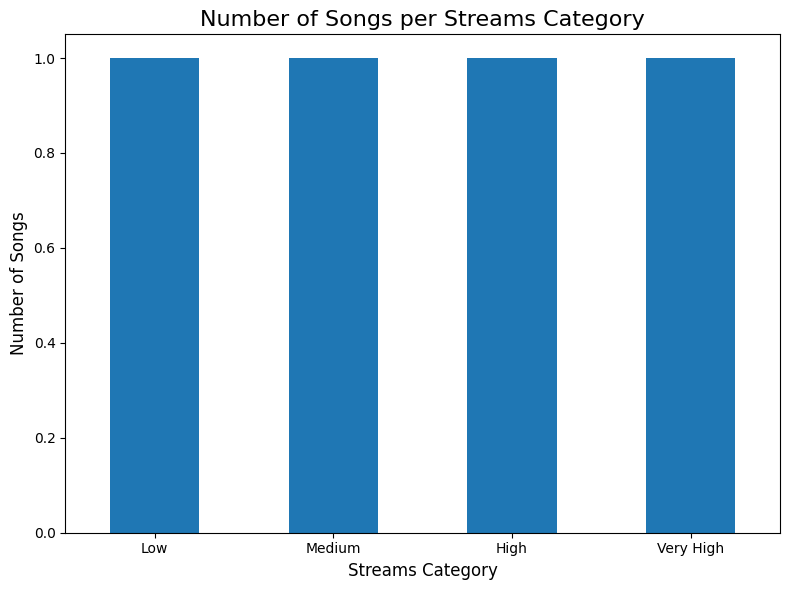

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'streams_category': ['Low', 'Medium', 'High', 'Very High']
}
df = pd.DataFrame(data)

category_counts = df['streams_category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')

# Add titles and labels
plt.title('Number of Songs per Streams Category', fontsize=16)
plt.xlabel('Streams Category', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)

# Display the bar chart
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
